# Fitbit Progress

#### Katriona Goldmann

This script looks at the general activity of the user. Inspired by by [Stephen Hsu's analysis](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) ([code here](https://github.com/stephenjhsu/fitbit/blob/master/Fitbit%20Exploration.ipynb)) and [Matt's Gamification of fitbit](https://towardsdatascience.com/the-gamification-of-fitbit-how-an-api-provided-the-next-level-of-training-eaf7b267af00).

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import plotly.io as pio
import datetime

%matplotlib inline

## Read in the data and merge

In [123]:
ex = pd.read_csv("./Outputs/exercise.csv")
summary = pd.read_csv("./Outputs/daily_summary.csv")
sleep = pd.read_csv("./Outputs/sleep_summary.csv")
sleep['date'] = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in sleep['Date']] 
sleep['date'] = [x.strftime('%d/%m/%Y') for x in sleep['date']]

In [126]:
daily = pd.merge(summary, sleep, how='outer', left_on='date', right_on='date')

In [127]:
daily = daily.drop(['Unnamed: 0_x', 'Date', 'Unnamed: 0_y'], axis=1)
daily = daily.dropna(1, 'all')

In [129]:
daily

,Cardio (mins at HR),Fat Burn (mins at HR),Out of Range/low (mins at HR),Peak (mins at HR),caloriesOut,fairlyActiveMinutes,lightlyActiveMinutes,restingHeartRate,sedentaryMinutes,steps,veryActiveMinutes,date,Bedtime (mins),Time asleep (mins),Time awake (mins),Time in bed (mins),Time very awake (mins),Total time,Wake up (mins)
0,0,19,562,0,1691,13,98,62.0,1282,8767,47,25/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,53,1387,0,1762,34,117,57.0,641,9909,30,26/12/2018,00:26:30,607.0,11.0,618.0,0.0,10.28,10:43:30
2,0,13,1427,0,1755,30,209,57.0,642,6038,0,27/12/2018,00:10:30,539.0,14.0,559.0,6.0,9.30,09:28:30
3,50,48,1243,0,2144,10,249,58.0,542,7465,56,28/12/2018,23:47:30,575.0,8.0,583.0,0.0,-14.30,09:29:30
4,0,53,1311,0,1849,17,176,60.0,623,10049,23,29/12/2018,23:02:00,566.0,25.0,601.0,10.0,-14.00,09:02:00
5,0,5,1435,0,1592,19,125,61.0,741,5852,7,30/12/2018,00:02:30,516.0,23.0,548.0,9.0,9.12,09:09:30
6,30,172,1238,0,2500,25,286,59.0,496,22505,94,31/12/2018,00:55:30,516.0,18.0,539.0,5.0,8.97,09:53:30
7,0,75,1365,0,2001,28,261,0.0,884,11816,17,01/01/2019,05:44:30,241.0,9.0,250.0,0.0,4.15,09:53:30
8,0,26,1197,0,1947,15,277,0.0,510,13144,3,02/01/2019,22:44:30,615.0,18.0,635.0,2.0,-13.43,09:18:30
9,0,37,1403,0,1988,6,343,0.0,500,11224,1,03/01/2019,00:39:30,557.0,33.0,590.0,0.0,9.82,10:28:30


## Plot trends over time

Create a trace for each parameter and normalise to 1 so it plots on one scale.

In [130]:
traces = []
omit_vars = [daily.columns.get_loc(c) for c in daily.columns if c in \
             ['date', 'Peak (mins at HR)', 'Bedtime (mins)', 'Wake up (mins)', 'Total time']]


for i in [ind for ind in range(1,len(daily.columns)) if ind not in omit_vars]:
     var = list(daily.columns.values)[i]
     xval = daily['date'][np.logical_not(np.isnan(daily[var]))]
     ynorm = [x for x in daily[var] if str(x) != 'nan'] 
    
     ynorm= [float(i)/max(ynorm) for i in ynorm]
    
     vis = True if var in ['caloriesOut', 'lightlyActiveMinutes', 'steps'] else "legendonly"
     traces.append(go.Scatter(x = xval, y=ynorm, text = daily[var], mode = 'lines', name=var, visible= vis, hoverinfo='text'))

In [131]:
layout = go.Layout(title='Daily Activity',yaxis = dict(showline=False, ticks='', showticklabels=False))
fig = go.Figure(traces, layout)
py.iplot(fig, filename='Daily-Activity')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [132]:
pio.write_image(fig, './figs/daily_activity.png')

-----

## How do these correlate?

In [133]:
import scipy
import scipy.cluster.hierarchy as sch

corrd = daily.corr()
corrd = corrd.dropna(0, thresh=8) 
corrd = corrd.dropna(1, thresh=8) 

corrd

,Cardio (mins at HR),Fat Burn (mins at HR),Out of Range/low (mins at HR),Peak (mins at HR),caloriesOut,fairlyActiveMinutes,lightlyActiveMinutes,restingHeartRate,sedentaryMinutes,steps,veryActiveMinutes,Time asleep (mins),Time awake (mins),Time in bed (mins),Time very awake (mins),Total time
Cardio (mins at HR),1.000000,0.267039,0.120627,0.283401,0.277397,-0.111036,0.124136,0.206085,-0.144110,0.132196,0.254101,0.156575,-0.124530,0.139512,-0.104024,0.003282
Fat Burn (mins at HR),0.267039,1.000000,0.522420,0.220554,0.712634,0.446187,0.185341,0.580254,-0.370182,0.779374,0.868086,-0.345607,-0.065522,-0.342904,0.041176,-0.075842
Out of Range/low (mins at HR),0.120627,0.522420,1.000000,-0.049841,0.571144,0.407814,0.380871,0.686150,-0.822566,0.508517,0.449177,0.253793,0.088703,0.260242,0.085610,-0.144634
Peak (mins at HR),0.283401,0.220554,-0.049841,1.000000,0.128499,-0.008179,-0.069770,0.178797,0.134056,0.155161,0.187706,-0.053366,-0.246523,-0.075985,-0.097272,0.191231
caloriesOut,0.277397,0.712634,0.571144,0.128499,1.000000,0.659637,0.745144,0.389724,-0.628979,0.951410,0.695522,-0.223627,0.101555,-0.213386,-0.031416,0.018905
fairlyActiveMinutes,-0.111036,0.446187,0.407814,-0.008179,0.659637,1.000000,0.459392,0.268016,-0.406178,0.682373,0.397785,-0.147882,-0.239735,-0.163812,0.002337,0.097520
lightlyActiveMinutes,0.124136,0.185341,0.380871,-0.069770,0.745144,0.459392,1.000000,-0.076064,-0.663878,0.586556,0.077397,-0.002022,0.238090,0.014679,-0.038664,0.190238
restingHeartRate,0.206085,0.580254,0.686150,0.178797,0.389724,0.268016,-0.076064,1.000000,-0.436860,0.417564,0.624421,0.145150,-0.147509,0.136344,0.111417,-0.211798
sedentaryMinutes,-0.144110,-0.370182,-0.822566,0.134056,-0.628979,-0.406178,-0.663878,-0.436860,1.000000,-0.523002,-0.261578,-0.409548,-0.242336,-0.425802,-0.098031,0.067435
steps,0.132196,0.779374,0.508517,0.155161,0.951410,0.682373,0.586556,0.417564,-0.523002,1.000000,0.791064,-0.293275,0.081883,-0.283213,-0.028004,-0.028345


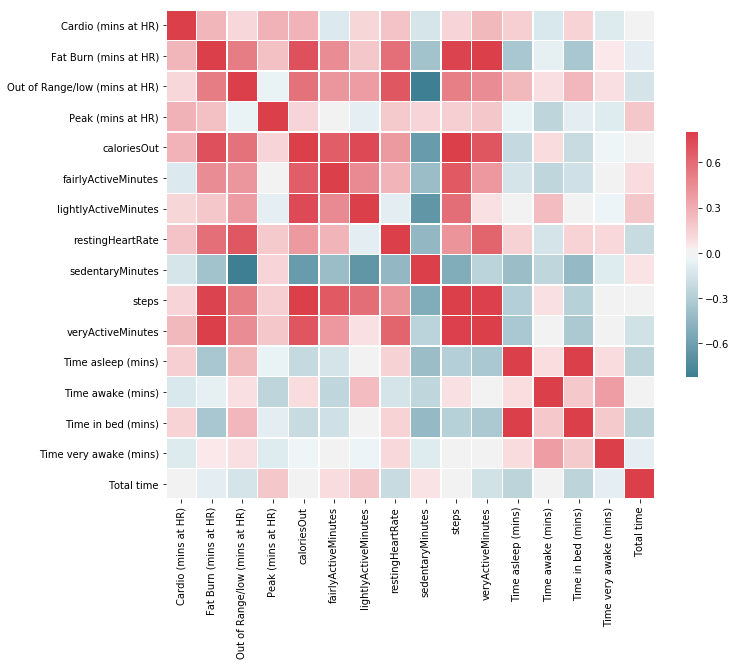

In [135]:
anchor_val = .8

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig_corr = sns.heatmap(corrd,  cmap=cmap, vmax=anchor_val,square=True, center=0, \
            xticklabels=True, yticklabels=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

fig = fig_corr.get_figure()

In [136]:
fig.savefig("./figs/Correlations.png") 

-----

## Now lets look at sleep

The gold line indicates the desired 8 hours of sleep

In [137]:
trace1 = go.Bar(x=daily['date'],y=daily['Time asleep (mins)']/60,name='Asleep')
trace2 = go.Bar(x=daily['date'],y=daily['Time awake (mins)']/60,name='Awake')
trace3 = go.Bar(x=daily['date'],y=daily['Time very awake (mins)']/60,name='Very Awake')

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack', title="Hours in bed", shapes=[
        {'type': 'line','x0': daily['date'][0],'y0': 8,'x1': daily['date'][len(daily['date'])-1],'y1': 8, 
        'line': {'color': 'gold','width': 3},},
    ])

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [138]:
pio.write_image(fig, './figs/sleep_dist.png')

In [139]:
print('Only getting the full 8 hours ' + \
      str(round(100*len([x for x in daily['Time asleep (mins)'] if x > 8*60])/len(daily['Time asleep (mins)']))) + \
      '% of the time')

Only getting the full 8 hours 41% of the time
